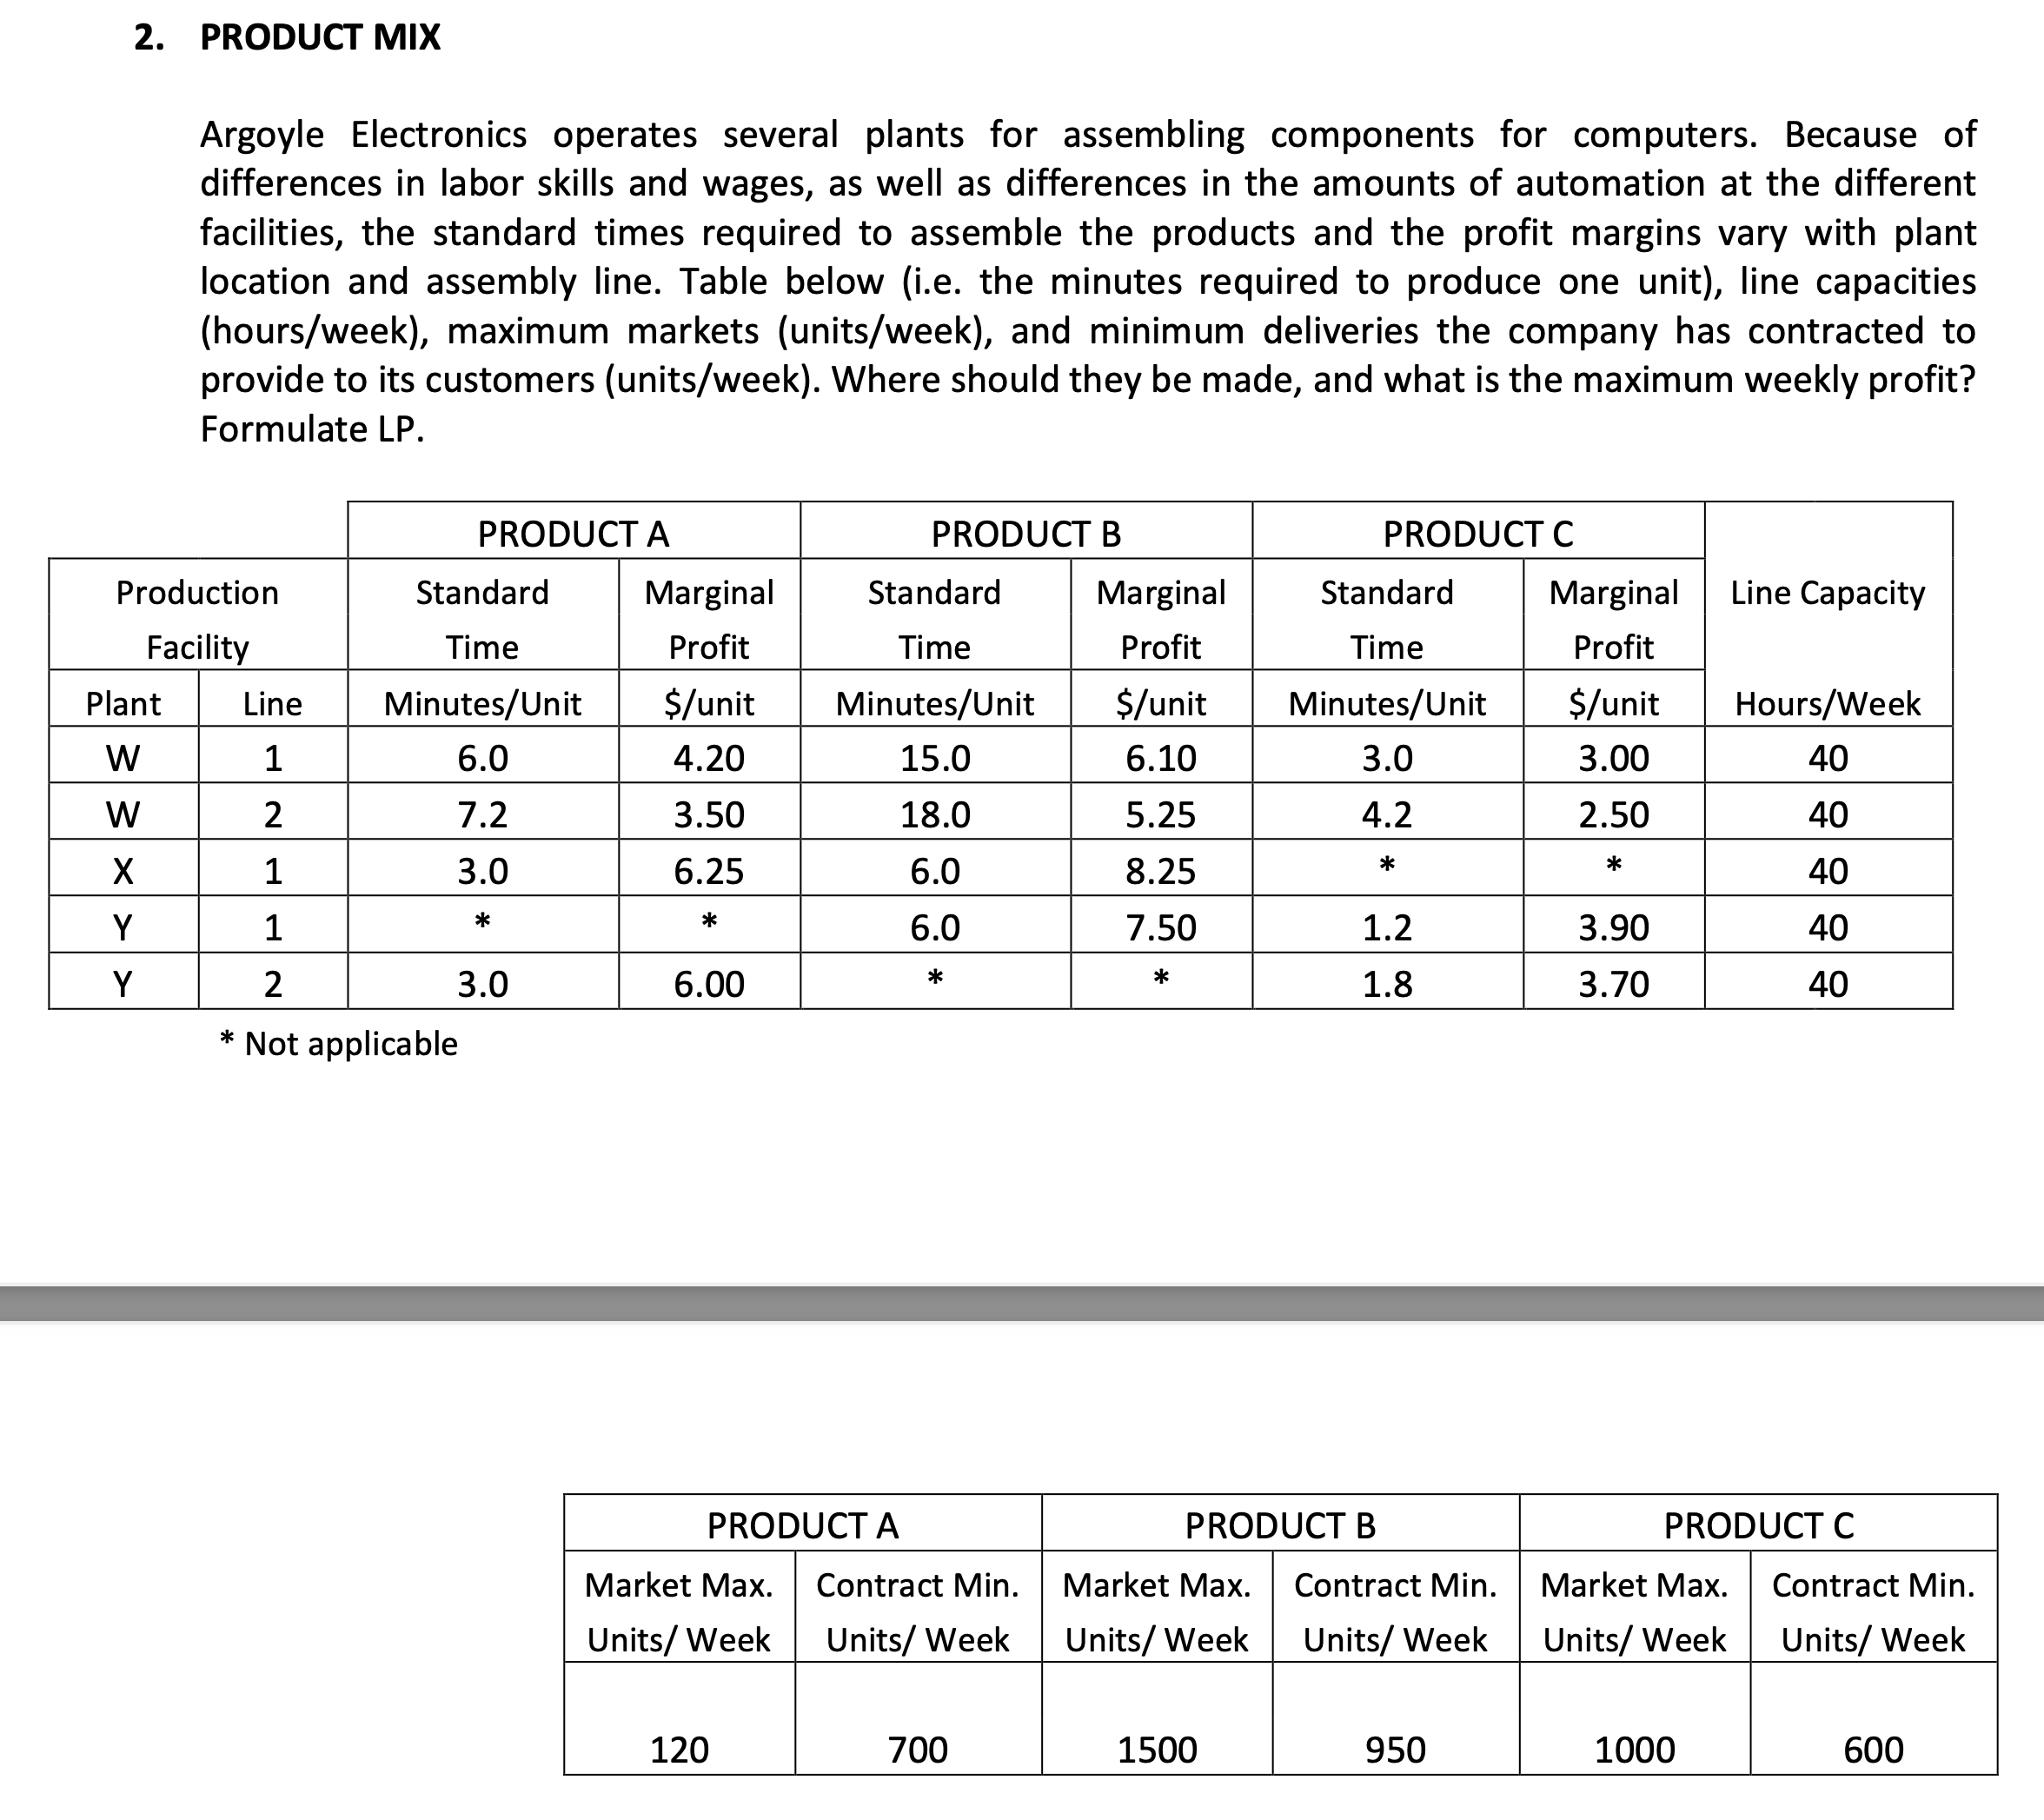

In [75]:
from pulp import *
import pandas as pd

In [82]:
# Create a LP Minimization problem
model = LpProblem("Product Mix", LpMaximize)

# Define decision variables
products = ['A', 'B', 'C']
facilities = ['W1', 'W2', 'X1', 'Y1', 'Y2']
x = LpVariable.dicts("unit", [(i, j) for i in products for j in facilities], lowBound=0, cat='Integer')

# Define the objective function
profit_coefficients = {
    ('A', 'W1'): 4.20, ('B', 'W1'): 6.10, ('C', 'W1'): 3.00,
    ('A', 'W2'): 3.50, ('B', 'W2'): 5.25, ('C', 'W2'): 2.50,
    ('A', 'X1'): 6.25, ('B', 'X1'): 8.25, ('C', 'X1'): 0.00,
    ('A', 'Y1'): 0.00, ('B', 'Y1'): 7.50, ('C', 'Y1'): 3.90,
    ('A', 'Y2'): 6.00, ('B', 'Y2'): 0.00, ('C', 'Y2'): 3.70
}

model += lpSum(profit_coefficients[(i, j)] * x[(i, j)] for i in products for j in facilities)

# Define constraints
time_coefficients = {
    ('A', 'W1'): 6.0, ('B', 'W1'): 15.0, ('C', 'W1'): 3.0,
    ('A', 'W2'): 7.2, ('B', 'W2'): 18.0, ('C', 'W2'): 4.2,
    ('A', 'X1'): 3.0, ('B', 'X1'): 6.0, ('C', 'X1'): 0.0,
    ('A', 'Y1'): 0.0, ('B', 'Y1'): 6.0, ('C', 'Y1'): 1.2,
    ('A', 'Y2'): 3.0, ('B', 'Y2'): 0.0, ('C', 'Y2'): 1.8
}

facility_capacity = {
    'W1': 40*60, 'W2': 40*60, 'X1': 40*60, 'Y1': 40*60, 'Y2': 40*60
}

market_constraints = {
    'A': 120, 'B': 1500, 'C': 1000
}

contract_constraints = {
    'A': 700, 'B': 950, 'C': 600
}

for j in facilities:
    model += lpSum(time_coefficients[(i, j)] * x[(i, j)] for i in products) <= facility_capacity[j]

for i in products:
    model += lpSum(x[(i, j)] for j in facilities) <= market_constraints[i]

for k in products:
    model += lpSum(x[(i, j)] for j in facilities) >= contract_constraints[i]

# Solve the problem
model.solve()

# Print the results
print("Status:", LpStatus[model.status])

print("Optimal Production Plan:")
for var in model.variables():
    print(var.name, "=", var.varValue)

print("Maximum Weekly Profit:", value(model.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/ee43d59ccf784959915e432bdb0e6ef0-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/ee43d59ccf784959915e432bdb0e6ef0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 16 COLUMNS
At line 101 RHS
At line 113 BOUNDS
At line 129 ENDATA
Problem MODEL has 11 rows, 15 columns and 42 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 12396 - 0.00 seconds
Cgl0004I processed model has 6 rows, 12 columns (12 integer (0 of which binary)) and 18 elements
Cutoff increment increased from 1e-05 to 0.04995
Cbc0012I Integer solution of -12394.25 found by DiveCoefficient after 0 i

/Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


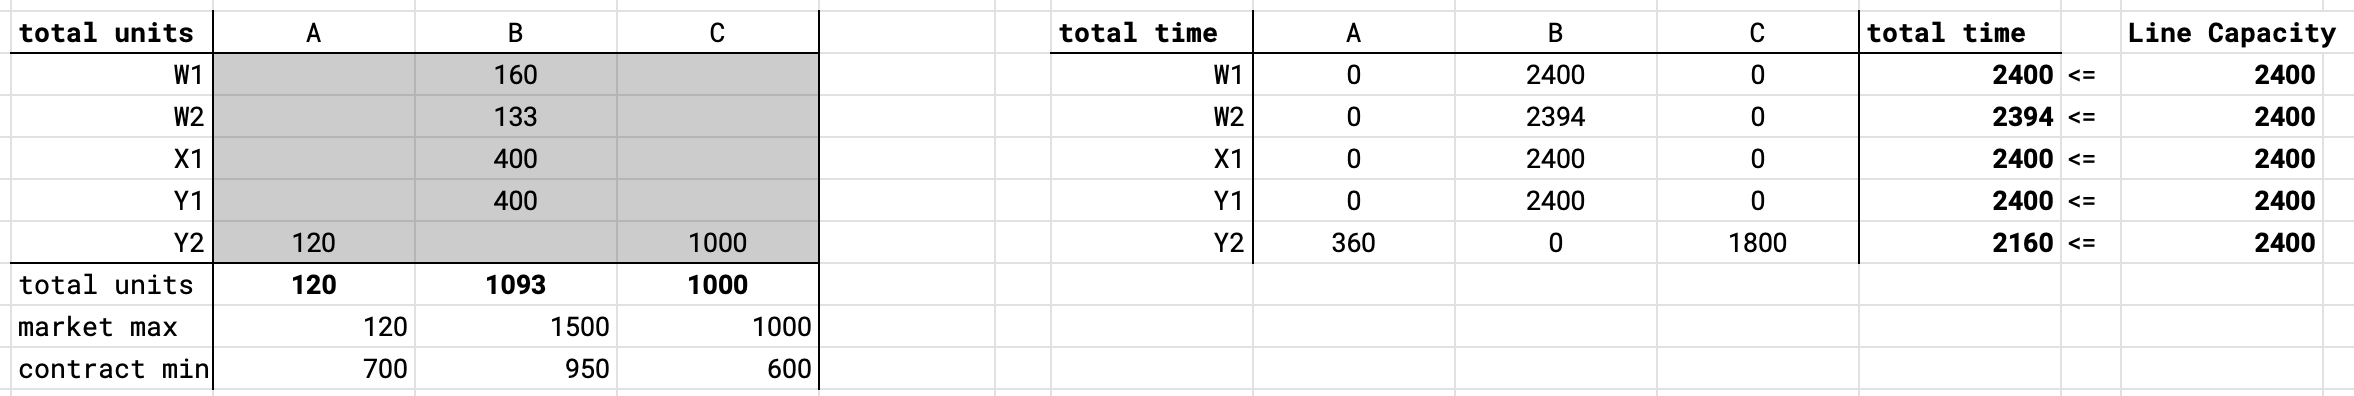

In [81]:
# Initialize the LP
model = LpProblem('Product Mix', LpMaximize)

# Decision Variables
x = LpVariable.dicts('x', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], lowBound=0, cat='Integer') # Products and Plants

print("Variable Map")
df = pd.DataFrame({'Plants': ['W1', 'W2', 'X1', 'Y1', 'Y2'],
                   'A': ['x1', 'x4', 'x7', 'x10', 'x13'],
                   'B': ['x2', 'x5', 'x8', 'x11', 'x14'],
                   'C': ['x3', 'x6', 'x9', 'x12', 'x15']
                   })
print(df)

# Objective Function
model += 4.20 * x[1] + 6.10 * x[2] + 3.00 * x[3] + \
         3.50 * x[4] + 5.25 * x[5] + 2.50 * x[6] + \
         6.25 * x[7] + 8.25 * x[8] + 0.00 * x[9] + \
         0.00 * x[10] + 7.50 * x[11] + 3.90 * x[12] + \
         6.00 * x[13] + 0.00 * x[14] + 3.70 * x[15]

# Add Constraints
# Line Capacity
model += 6.0 * x[1] + 15.0 * x[2] + 3.0 * x[3] <= 40 * 60, "Plant W Line 1"
model += 7.2 * x[4] + 18.0 * x[5] + 4.2 * x[6] <= 40 * 60, "Plant W Line 2"
model += 3.0 * x[7] + 6.0 * x[8] <= 40 * 60, "Plant X Line 1"
model += 6.0 * x[11] + 1.2 * x[12] <= 40 * 60, "Plant Y Line 1"
model += 3.0 * x[13] + 1.8 * x[15] <= 40 * 60, "Plant Y Line 2"

# Market Max
model += x[1] + x[4] + x[7] + x[13] <= 120, "Product A Market Max"
model += x[2] + x[5] + x[8] + x[11] <= 1500, "Product B Market Max"
model += x[3] + x[6] + x[12] + x[15] <= 1000, "Product C Market Max"

# Contract Min
model += x[1] + x[4] + x[7] + x[13] >= 700, "Product A Contract Min"
model += x[2] + x[5] + x[8] + x[11] >= 950, "Product B Contract Min"
model += x[3] + x[6] + x[12] + x[15] >= 600, "Product C Contract Min"

print(model)

# Solve the model
model.solve()

# Print the results
print("Status:", LpStatus[model.status])

print("Optimal Production Plan:")
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
max_profit = value(model.objective)
print(f"Maximum Weekly Profit = {max_profit}")

Variable Map
  Plants    A    B    C
0     W1   x1   x2   x3
1     W2   x4   x5   x6
2     X1   x7   x8   x9
3     Y1  x10  x11  x12
4     Y2  x13  x14  x15
Product_Mix:
MAXIMIZE
4.2*x_1 + 7.5*x_11 + 3.9*x_12 + 6.0*x_13 + 3.7*x_15 + 6.1*x_2 + 3.0*x_3 + 3.5*x_4 + 5.25*x_5 + 2.5*x_6 + 6.25*x_7 + 8.25*x_8 + 0.0
SUBJECT TO
Plant_W_Line_1: 6 x_1 + 15 x_2 + 3 x_3 <= 2400

Plant_W_Line_2: 7.2 x_4 + 18 x_5 + 4.2 x_6 <= 2400

Plant_X_Line_1: 3 x_7 + 6 x_8 <= 2400

Plant_Y_Line_1: 6 x_11 + 1.2 x_12 <= 2400

Plant_Y_Line_2: 3 x_13 + 1.8 x_15 <= 2400

Product_A_Market_Max: x_1 + x_13 + x_4 + x_7 <= 120

Product_B_Market_Max: x_11 + x_2 + x_5 + x_8 <= 1500

Product_C_Market_Max: x_12 + x_15 + x_3 + x_6 <= 1000

Product_A_Contract_Min: x_1 + x_13 + x_4 + x_7 >= 700

Product_B_Contract_Min: x_11 + x_2 + x_5 + x_8 >= 950

Product_C_Contract_Min: x_12 + x_15 + x_3 + x_6 >= 600

VARIABLES
0 <= x_1 Integer
0 <= x_11 Integer
0 <= x_12 Integer
0 <= x_13 Integer
0 <= x_15 Integer
0 <= x_2 Integer
0 <= x_3 I

/Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
